This code implements the GPstruct learning algorithm:
- in the chain case, as presented in our [arXiv paper](http://arxiv.org/abs/1307.3846)
- in the grid case, as presented in our [ICML 2014 paper](http://jmlr.org/proceedings/papers/v32/bratieres14.html)

### Requirements ###

The code has been tested with Python 2.7.8 and 3.4.1, Numpy 1.8.1, Numba 0.13.3, on Ubuntu 12.04.

#### Source code files ####

There are basically two groups of code files:
- first group deals with the core MCMC loop, in which both training and prediction is carried out (by default at each MCMC iteration, cf param prediction_thinning). The ESS algo sits there too. And this deals with the GP aspect of GPstruct: kernel matrices, kernel functions, f\*|f etc. My notation follows the Rasmussen and Williams book.
- second group deals with likelihoods and computing marginals from data, given a vector of latent variables f. We've worked with chains and grids. In the chain case, I've coded the forward-backwards algo directly for likelihood and computing the marginals. In the grid case, we've looked at approximate likelihood with pseudo-likelihood (which I coded up) and approximate inference with TRW, as well as exact likelihood (ie max product) and inference (ie exact belief propagation in the grid -- can only be applied to small grids of course). TRW, and the exact schemes make use of a 3rd party library, libDAI, and a Python wrapper, pylibdai, cf URLs in grid_libdai_inference.py.

Chain data: we used 4 tasks from the CRF++ dataset. The .x files have got sparse feature vectors for each position in the chain (ie word). The .y vectors have got the reference labels for each word. So my program is not concerned with feature extraction at all.

#### Gotchas ####

learn_predic_gpstruct ca line 218, computation of f\_star\_mean: Note that because of eq 4 (arXiv preprint), the kernel matrices need to contain only data for k_x, not for k_u (which contains k_x blocks on the diagonal). Therefore when eg multiplying  with an f, you need to do as if you were repeating the kernel matrix on the diagonal, and multiply by blocks of f every time (iterating over labels y_t).

Sampling from f\* (as opposed to taking the mode/ mean f\*\_MAP as now) is not implemented yet, it doesn't seem to bring a performance improvement, cf arXiv paper.

Not implemented either at this point (working on it): hyperparameter sampling.

The ICML paper requires splitting up training and prediction in order to do ensemble learning. That's not implemented yet. It requires being able to compute pseudo-likelihoods on grids where only some pixels are seen (ie there are occluded pixels); that's implemented in the PL code (cf visible_pixels argument).

hashable_compute_kStarTKInv_unary: will cache the computation of this kernel matrix, in case it can be re-used for a subsequent run on the same data, if it is still in memory.

In [1]:
pygpstruct_location = '/xvdb/pygpstruct'


In [1]:
! rm -rf /home/sb358/pygpstruct_demo
! cd /home/sb358/pygpstruct-master
! mkdir /home/sb358/pygpstruct_demo
! git archive master | tar -x -C /home/sb358/pygpstruct_demo

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append(pygpstruct_location + '/src/') # replace by your path to .py files

In [ ]:
import prepare_from_data_chain
import numpy as np
n_data=10
!rm -rf /tmp/pygpstruct_demo
prepare_from_data_chain.learn_predict_gpstruct_wrapper(data_indices_train = np.arange(n_data), # training data= first 10 data files
                                                       data_indices_test = np.arange(n_data, n_data*2), # test data= next 10 files
                                                       result_prefix='/tmp/pygpstruct_demo/', # where to store the result files
                                                       data_folder = pygpstruct_location + '/data/japanesene/',
                                                       n_samples=501, # how many MCMC iterations
                                                       task='japanesene',
                                                       prediction_thinning=100
                                                       )


2016-04-22 14:35:43,053Z - INFO - learn_predict_gpstruct started with arguments: {'no_hotstart': False, 'prediction_thinning': 100, 'prepare_from_data': <function learn_predict_gpstruct_wrapper.<locals>.<lambda> at 0x7f57d6ad1e18>, 'hp_sampling_mode': None, 'lhp_init': {'jitter': -9.2103403719761818, 'unary': 0.0, 'binary': -4.6051701859880909}, 'prediction_verbosity': None, 'n_f_star': 0, 'stop_check': None, 'log_f': False, 'lhp_gset': (<function default_get_lhp_target at 0x7f57da06c510>, <function default_set_lhp_target at 0x7f57da06c378>), 'hp_sampling_thinning': 1, 'lhp_prior': <function <lambda> at 0x7f57da06c598>, 'n_samples': 501, 'random_seed': 0, 'console_log': True, 'result_prefix': '/tmp/pygpstruct_demo/', 'lhp_update': None, 'kernel': <function kernel_linear at 0x7f57ec536e18>}
2016-04-22 14:35:43,076Z - INFO - source code status: Local changes:
 M src/ess_k_sampler.py
 M src/learn_predict.py
 M src/util_experiments.py
?? data/protein/
Hash of current commit: df90ec62e3938b

In [4]:
import prepare_from_data_chain
import numpy as np
n_data=10
!rm -rf /tmp/pygpstruct_demo
prepare_from_data_chain.learn_predict_gpstruct_wrapper(data_indices_train = np.arange(n_data), # training data= first 10 data files
                                                       data_indices_test = np.arange(n_data, n_data*2), # test data= next 10 files
                                                       result_prefix='/tmp/pygpstruct_demo/', # where to store the result files
                                                       data_folder = pygpstruct_location + '/data/japanesene/',
                                                       n_samples=501, # how many MCMC iterations
                                                       task='japanesene',
                                                       prediction_thinning=100
                                                       )


2016-04-06 13:14:47,831Z - INFO - learn_predict_gpstruct started with arguments: {'kernel': <function kernel_linear at 0x7fcfde62e268>, 'hp_sampling_thinning': 1, 'hp_sampling_mode': None, 'lhp_init': {'jitter': -9.2103403719761818, 'binary': -4.6051701859880909, 'unary': 0.0}, 'prediction_thinning': 100, 'result_prefix': '/tmp/pygpstruct_demo/', 'n_samples': 501, 'lhp_gset': (<function default_get_lhp_target at 0x7fcfc8341b70>, <function default_set_lhp_target at 0x7fcfc83419d8>), 'log_f': False, 'n_f_star': 0, 'lhp_prior': <function <lambda> at 0x7fcfc8341bf8>, 'no_hotstart': False, 'console_log': True, 'prediction_verbosity': None, 'prepare_from_data': <function learn_predict_gpstruct_wrapper.<locals>.<lambda> at 0x7fcfd6ec69d8>, 'stop_check': None, 'lhp_update': None, 'random_seed': 0}
2016-04-06 13:14:47,846Z - INFO - source code status: Local changes:
 M src/chain_forwards_backwards_logsumexp.py
 M src/prepare_from_data_chain.py
 M src/util_experiments.py
?? data/protein/
Hash of

### Speed-up: C implementation for forwards-backwards

I originally implemented the forwards-backwards algorithm used to compute the likelihood in the MCMC algorithm used for training in Numba. Because this is the speed bottleneck for training, I have reimplemented it in C as a Python module, which needs to be compiled separately:

In [4]:
! cd /home/sb358/pygpstruct-master/src/chain_forwards_backwards_native/; python setup.py install

running install
running build
running build_ext
running install_lib
running install_egg_info
Removing /home/sb358/anaconda/lib/python2.7/site-packages/UNKNOWN-0.0.0-py2.7.egg-info
Writing /home/sb358/anaconda/lib/python2.7/site-packages/UNKNOWN-0.0.0-py2.7.egg-info


Then the native implementation can be used instead of the default Numba implementation by passing the native_implementation=True argument; that makes the run much faster:

In [4]:
n_data=10
!rm -rf /tmp/pygpstruct_demo
prepare_from_data_chain.learn_predict_gpstruct_wrapper(data_indices_train = np.arange(n_data), # training data= first 10 data files
                                                       data_indices_test = np.arange(n_data, n_data*2), # test data= next 10 files
                                                       result_prefix='/tmp/pygpstruct_demo/', # where to store the result files
                                                       data_folder = pygpstruct_location + '/data/japanesene/',
                                                       n_samples=501, # how many MCMC iterations
                                                       task='japanesene',
                                                       native_implementation = True,
                                                       prediction_thinning=100
                                                       )


2016-04-06 12:33:55,905Z - INFO - learn_predict_gpstruct started with arguments: {'console_log': True, 'prediction_thinning': 100, 'result_prefix': '/tmp/pygpstruct_demo/', 'no_hotstart': False, 'log_f': False, 'prepare_from_data': <function learn_predict_gpstruct_wrapper.<locals>.<lambda> at 0x7f57d4191d08>, 'n_samples': 501, 'lhp_update': None, 'hp_sampling_mode': None, 'hp_sampling_thinning': 1, 'kernel': <function kernel_linear at 0x7f57ea5929d8>, 'random_seed': 0, 'lhp_prior': <function <lambda> at 0x7f57d4197400>, 'n_f_star': 0, 'lhp_gset': (<function default_get_lhp_target at 0x7f57d4197378>, <function default_set_lhp_target at 0x7f57d41971e0>), 'prediction_verbosity': None, 'lhp_init': {'binary': -4.6051701859880909, 'unary': 0.0, 'jitter': -9.2103403719761818}, 'stop_check': None}
2016-04-06 12:33:55,920Z - INFO - source code status: Local changes:
 M src/chain_forwards_backwards_logsumexp.py
 M src/util_experiments.py
?? data/protein/
Hash of current commit: 64822d6cd54264331

### Plotting the MCMC run

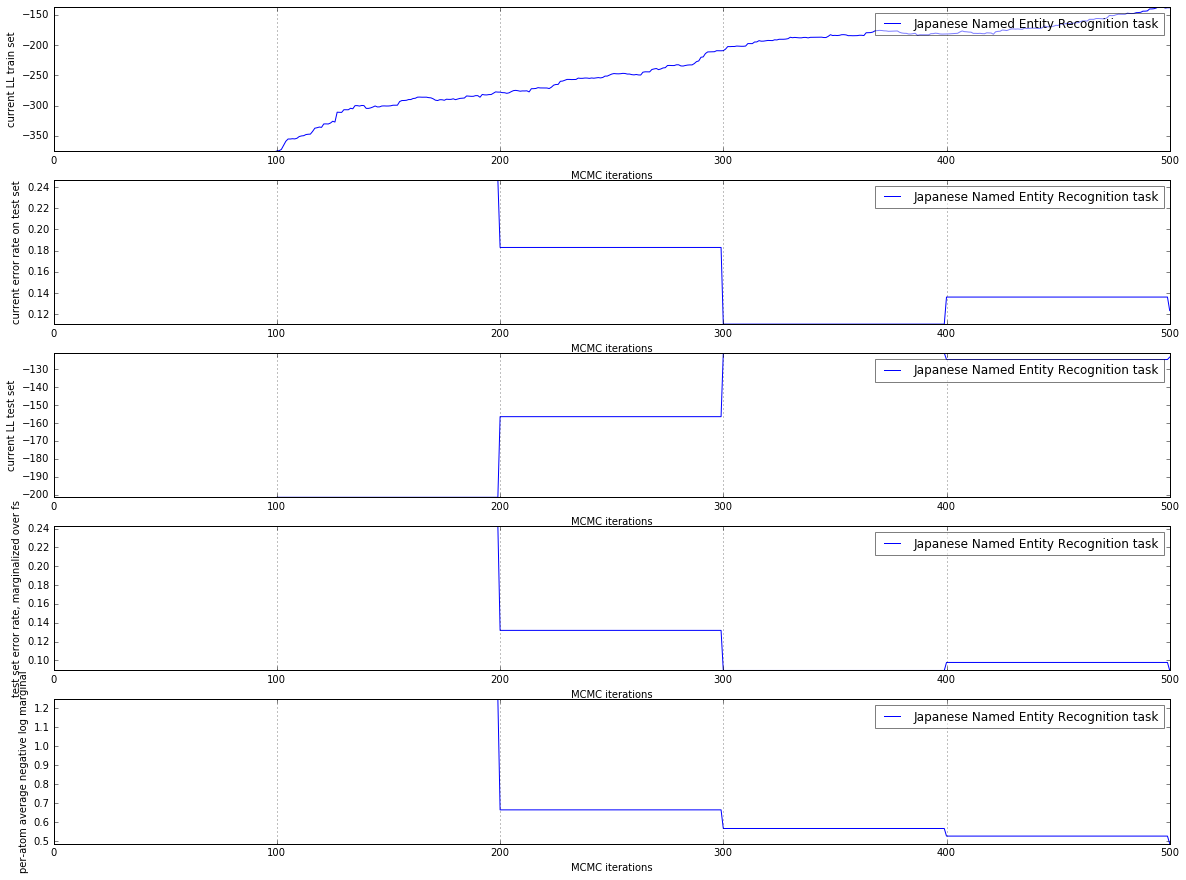

In [14]:
import util_experiments
util_experiments.make_figure(np.arange(5), # display all 5 collected types of data
            [('Japanese Named Entity Recognition task', '/tmp/pygpstruct_demo' + '/results.bin')], # can display several results on same plot by appending tuples to this list
            bottom=None, top=None, max_display_length=2500)

### Interrupting the training stage, hotstart

The MCMC chain's state is saved at every MCMC step; that includes the state of the pseudo-random number generator, the last f, the current log likelihood, the marginals so far etc. 

The MCMC chain can be interrupted between steps. However, there is no mechanism to prevent it from being stopped while it writes the state files to disk, which would cause the state to be lost. Interrupt the MCMC chain can be done thus:
- by reaching n_samples, the number of samples we wanted to draw
- by stopping the Python process
- by passing to learn_predict_gpstruct_wrapper a parameter stop_check() which is evaluated at every iteration. In util.py, there is an example to stop the chain after some defined run time is over. One could also imagine checking for the existence of a flag file, and stopping the process if the file is created; in this way, a simple touch command would allow stopping the training cleanly.

When restarting with the same results directory, the program will check for the existence of saved state files. If it finds them, it will restart from the last saved state and continue the chain. It is the user's responsibility to ensure that the saved state corresponds exactly to the configuration of the experiment that is restarted. For instance, the training and test data should match, and the various other parameters passed to learn_predict_gpstruct should match as well.

For example, here we run the chain for 10 samples:

In [7]:
n_data=10
!rm -rf /tmp/pygpstruct_demo
prepare_from_data_chain.learn_predict_gpstruct_wrapper(data_indices_train = np.arange(n_data), # training data= first 10 data files
                                                       data_indices_test = np.arange(n_data, n_data*2), # test data= next 10 files
                                                       result_prefix='/tmp/pygpstruct_demo/', # where to store the result files
                                                       data_folder = pygpstruct_location + '/data/japanesene/',
                                                       n_samples=10, # how many MCMC iterations
                                                       task='japanesene',
                                                       prediction_thinning=1
                                                       )

2014-10-23 12:07:41,150Z - INFO - learn_predict_gpstruct started with arguments: {'kernel': <function kernel_linear_unary at 0x7f3c92ae3ed8>, 'console_log': True, 'random_seed': 0, 'prediction_verbosity': None, 'n_samples': 10, 'hp_sampling_thinning': 1, 'hp_sampling_mode': None, 'hp_debug': False, 'prior': 1, 'lhp_update': {}, 'prepare_from_data': <function <lambda> at 0x7f3c8c794938>, 'stop_check': None, 'n_f_star': 0, 'prediction_thinning': 1, 'result_prefix': '/tmp/pygpstruct_demo/'}
2014-10-23 12:07:41,154Z - INFO - prepare_from_data_chain started with arguments: {'data_folder': '/home/sb358/pygpstruct_demo/data/japanesene/', 'data_indices_train': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'n_labels': 17, 'native_implementation': False, 'data_indices_test': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]), 'n_features_x': 102799, 'logger': <logging.Logger object at 0x7f3c8e3541d0>}
2014-10-23 12:07:41,258Z - DEBUG - prepare kernel matrices
2014-10-23 12:07:41,270Z - DEBUG - start MCMC 

... and now we can run the same chain for another 10 samples if we wish:

In [8]:
n_data=10
# !rm -rf /tmp/pygpstruct_demo # don't erase the results folder this time !
prepare_from_data_chain.learn_predict_gpstruct_wrapper(data_indices_train = np.arange(n_data), # training data= first 10 data files
                                                       data_indices_test = np.arange(n_data, n_data*2), # test data= next 10 files
                                                       result_prefix='/tmp/pygpstruct_demo/', # where to store the result files
                                                       data_folder = pygpstruct_location + '/data/japanesene/',
                                                       n_samples=20, # how many MCMC iterations
                                                       task='japanesene',
                                                       prediction_thinning=1
                                                       )
!rm -rf /tmp/pygpstruct_demo # clean up afterwards however

2014-10-23 12:07:42,441Z - INFO - learn_predict_gpstruct started with arguments: {'kernel': <function kernel_linear_unary at 0x7f3c92ae3ed8>, 'console_log': True, 'random_seed': 0, 'prediction_verbosity': None, 'n_samples': 20, 'hp_sampling_thinning': 1, 'hp_sampling_mode': None, 'hp_debug': False, 'prior': 1, 'lhp_update': {}, 'prepare_from_data': <function <lambda> at 0x7f3c8c7c2758>, 'stop_check': None, 'n_f_star': 0, 'prediction_thinning': 1, 'result_prefix': '/tmp/pygpstruct_demo/'}
2014-10-23 12:07:42,443Z - INFO - prepare_from_data_chain started with arguments: {'data_folder': '/home/sb358/pygpstruct_demo/data/japanesene/', 'data_indices_train': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'n_labels': 17, 'native_implementation': False, 'data_indices_test': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]), 'n_features_x': 102799, 'logger': <logging.Logger object at 0x7f3c8e3541d0>}
2014-10-23 12:07:42,537Z - DEBUG - prepare kernel matrices
2014-10-23 12:07:42,549Z - DEBUG - start MCMC 

### A real run with more data

In [9]:
n_data=150
!rm -rf /tmp/pygpstruct_demo_long_run
prepare_from_data_chain.learn_predict_gpstruct_wrapper(data_indices_train = np.arange(n_data), # training data= first 10 data files
                                                       data_indices_test = np.arange(n_data, n_data*2), # test data= next 10 files
                                                       result_prefix='/tmp/pygpstruct_demo_long_run/', # where to store the result files
                                                       data_folder = pygpstruct_location + '/data/basenp/',
                                                       n_samples=1001, # how many MCMC iterations
                                                       task='basenp',
                                                       prediction_thinning=100,
                                                       native_implementation=True
                                                       )

2014-10-23 12:07:44,093Z - INFO - learn_predict_gpstruct started with arguments: {'kernel': <function kernel_linear_unary at 0x7f3c92ae3ed8>, 'console_log': True, 'random_seed': 0, 'prediction_verbosity': None, 'n_samples': 1001, 'hp_sampling_thinning': 1, 'hp_sampling_mode': None, 'hp_debug': False, 'prior': 1, 'lhp_update': {}, 'prepare_from_data': <function <lambda> at 0x7f3c8c794140>, 'stop_check': None, 'n_f_star': 0, 'prediction_thinning': 100, 'result_prefix': '/tmp/pygpstruct_demo_long_run/'}
2014-10-23 12:07:44,103Z - INFO - prepare_from_data_chain started with arguments: {'data_folder': '/home/sb358/pygpstruct_demo/data/basenp/', 'data_indices_train': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58, 